In [2]:
#Project built by Rohit Joshi 
#This projects aims to predict the Median House Values, based upon their respective attributes like Ocean Proximity, No of Rooms etc.
#Data set acquired from Kaggle
#importing all relevant packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#assigning the data to the dataframe variable named 'data'

In [3]:
data = pd.read_csv("housing.csv")

#brief description of our data

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#The description shows that there is a mismatch amongst the null and not null values in our data
#So in order to curb any Nan errors, I will drop all Nan values from our dataframe

In [47]:
data.dropna(inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#Here, we now see that there are equal number of values, neither of which are null

#To segregate our training and testing data, we use the 'train_test_split' method

In [49]:
from sklearn.model_selection import train_test_split

#Here, our target, i.e, the value we wish to predict, 'median_house_value', is removed from the X-axis of our training data
#Now, we asssign the Y-axis to the value that we wish to predict

In [50]:
X= data.drop(['median_house_value'], axis=1)
Y= data['median_house_value']

In [51]:
X, Y

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -122.23     37.88                41.0        880.0           129.0   
 1        -122.22     37.86                21.0       7099.0          1106.0   
 2        -122.24     37.85                52.0       1467.0           190.0   
 3        -122.25     37.85                52.0       1274.0           235.0   
 4        -122.25     37.85                52.0       1627.0           280.0   
 ...          ...       ...                 ...          ...             ...   
 20635    -121.09     39.48                25.0       1665.0           374.0   
 20636    -121.21     39.49                18.0        697.0           150.0   
 20637    -121.22     39.43                17.0       2254.0           485.0   
 20638    -121.32     39.43                18.0       1860.0           409.0   
 20639    -121.24     39.37                16.0       2785.0           616.0   
 
        population  households  median

#Splitting the X and Y axes into trainig and testing axes
#80% of the data is randomly assigned for training and 20% will be tested upon

In [52]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2) 

In [53]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
55,-122.28,37.82,52.0,945.0,243.0,576.0,220.0,1.4113,NEAR BAY
18218,-122.07,37.40,16.0,3352.0,813.0,1440.0,729.0,3.7359,NEAR BAY
13327,-117.66,34.05,33.0,960.0,216.0,831.0,222.0,2.5391,INLAND
8374,-118.35,33.96,26.0,2773.0,681.0,1560.0,631.0,3.1354,<1H OCEAN
8360,-118.34,33.97,45.0,2230.0,364.0,949.0,344.0,5.5000,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,3012.0,527.0,1288.0,512.0,3.6449,NEAR BAY
12725,-121.35,38.61,27.0,3900.0,776.0,1549.0,761.0,2.7788,INLAND
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
11437,-117.96,33.65,21.0,2030.0,318.0,910.0,311.0,7.8453,<1H OCEAN


#Now we will collate the training data by using the join() method to combine X and Y axes

In [54]:
train_data= X_train.join(Y_train)

#An illustration of the training data, to see how the values are promulgated

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

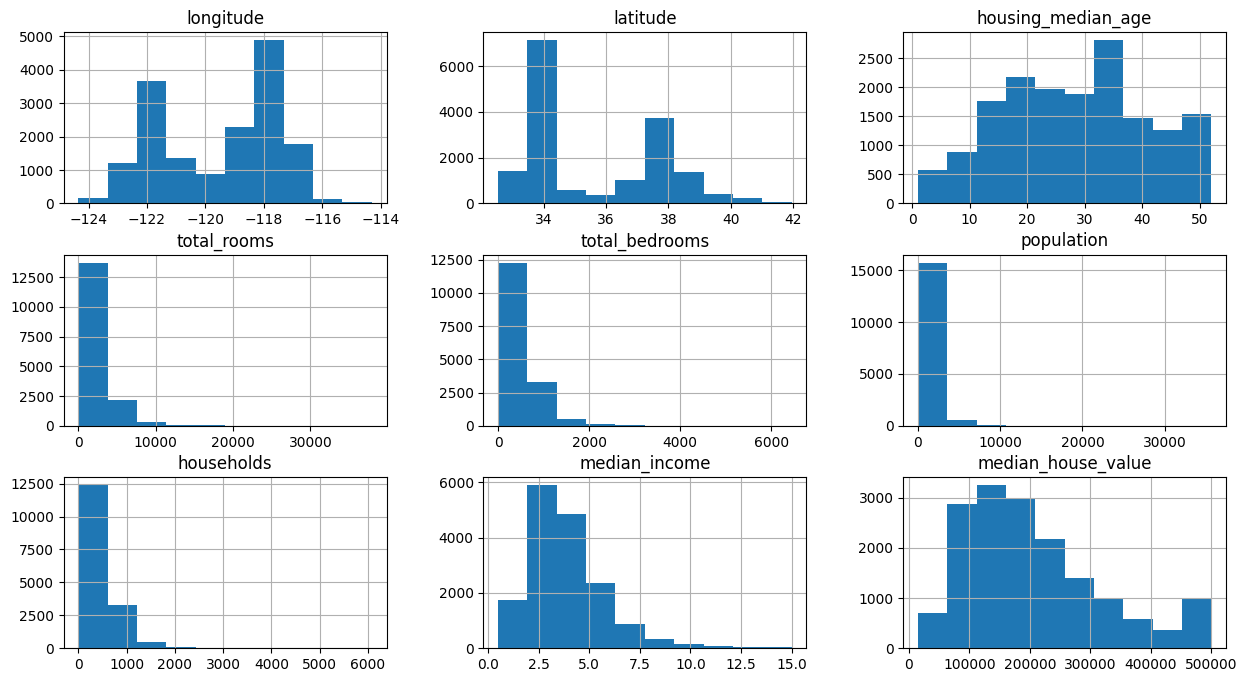

In [56]:
train_data.hist(figsize=(15,8))

In [ ]:
#Correlation of our data amongst themselves 

In [57]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923833,-0.111980,0.049211,0.074526,0.103460,0.061647,-0.017185,-0.047360
latitude,-0.923833,1.000000,0.014397,-0.038564,-0.069924,-0.110882,-0.075216,-0.078245,-0.142768
housing_median_age,-0.111980,0.014397,1.000000,-0.358320,-0.319424,-0.290452,-0.300998,-0.114601,0.103938
total_rooms,0.049211,-0.038564,-0.358320,1.000000,0.929226,0.852275,0.917514,0.191106,0.129645
total_bedrooms,0.074526,-0.069924,-0.319424,0.929226,1.000000,0.872136,0.978893,-0.016938,0.043838
population,0.103460,-0.110882,-0.290452,0.852275,0.872136,1.000000,0.902742,-0.001188,-0.030675
households,0.061647,-0.075216,-0.300998,0.917514,0.978893,0.902742,1.000000,0.004780,0.059120
median_income,-0.017185,-0.078245,-0.114601,0.191106,-0.016938,-0.001188,0.004780,1.000000,0.690408
median_house_value,-0.047360,-0.142768,0.103938,0.129645,0.043838,-0.030675,0.059120,0.690408,1.000000


In [ ]:
#An even more in-depth illustration of our data using a Seaborn heatmap, showing the correlation among the data

<Axes: >

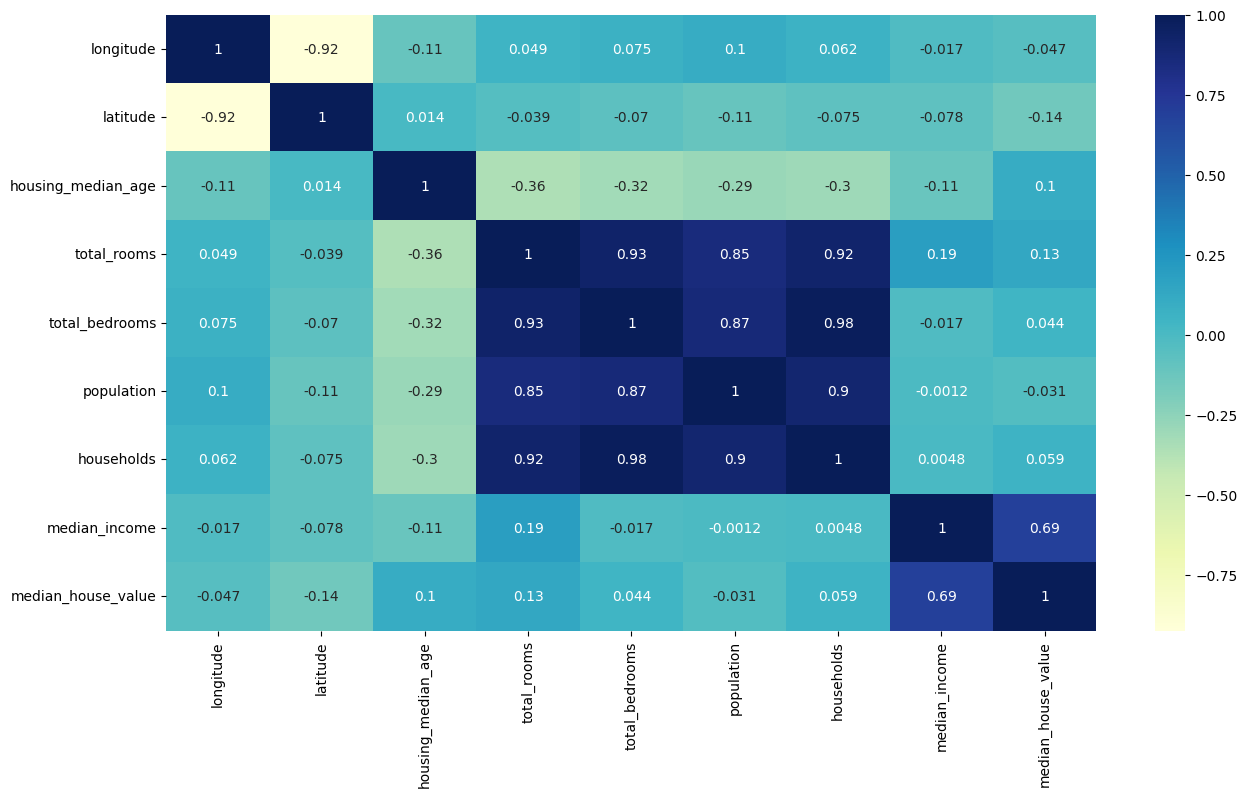

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

#As shown by the histogram, we need to skew the data for certain columns to make their data broadcast more centralised, which will augment the accuracy of the model

In [59]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

#Seeing the histogram again with the re-skewed data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

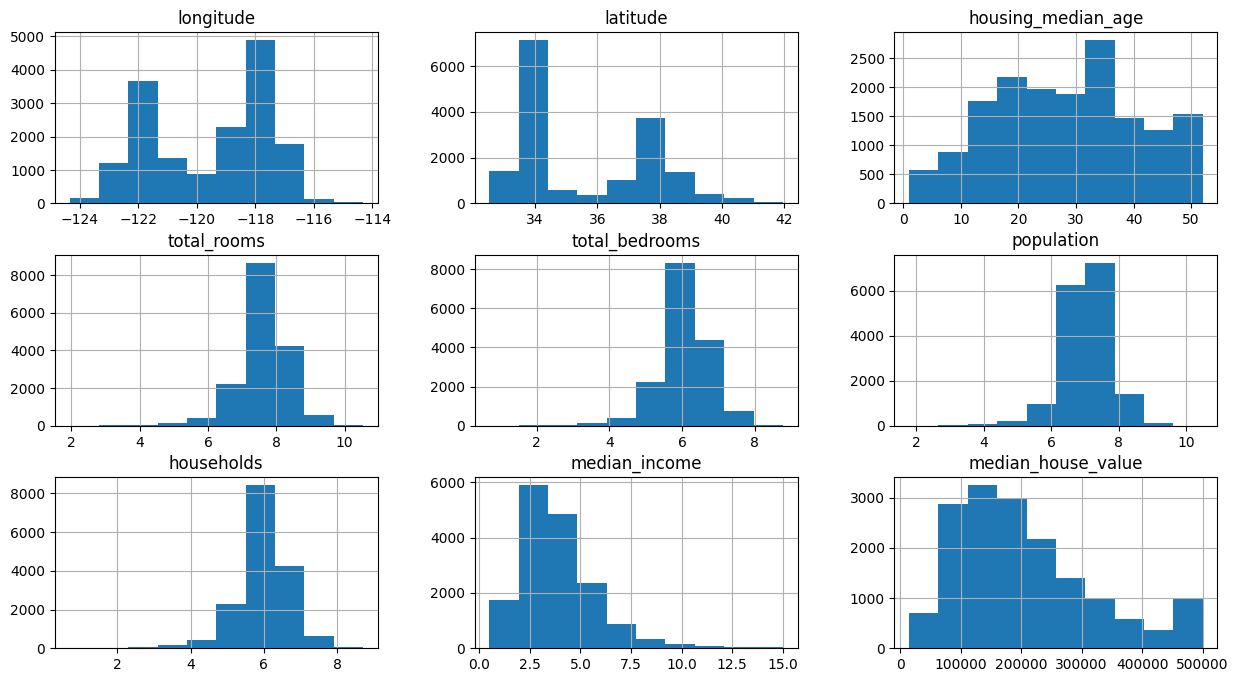

In [60]:
train_data.hist(figsize=(15,8))

In [61]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,NEAR BAY,83100.0
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,NEAR BAY,262500.0
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,INLAND,108600.0
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,<1H OCEAN,164300.0
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,<1H OCEAN,188200.0
...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,NEAR BAY,211500.0
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,INLAND,115700.0
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,<1H OCEAN,204600.0
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,<1H OCEAN,343300.0


In [62]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int))

In [63]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,NEAR BAY,83100.0,0,0,0,1,0
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,NEAR BAY,262500.0,0,0,0,1,0
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,INLAND,108600.0,0,1,0,0,0
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,<1H OCEAN,164300.0,1,0,0,0,0
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,<1H OCEAN,188200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,NEAR BAY,211500.0,0,0,0,1,0
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,INLAND,115700.0,0,1,0,0,0
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,<1H OCEAN,204600.0,1,0,0,0,0
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,<1H OCEAN,343300.0,1,0,0,0,0


In [ ]:
#Dropping the 'ocean_proximity' column , for it was not helpful and was Hot encoded into 1s and 0s by the get_dummies() fn of Pandas.

In [64]:
train_data= train_data.drop(['ocean_proximity'], axis=1)

In [65]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,83100.0,0,0,0,1,0
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,262500.0,0,0,0,1,0
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,108600.0,0,1,0,0,0
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,164300.0,1,0,0,0,0
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,188200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,211500.0,0,0,0,1,0
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,115700.0,0,1,0,0,0
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,204600.0,1,0,0,0,0
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,343300.0,1,0,0,0,0


<Axes: >

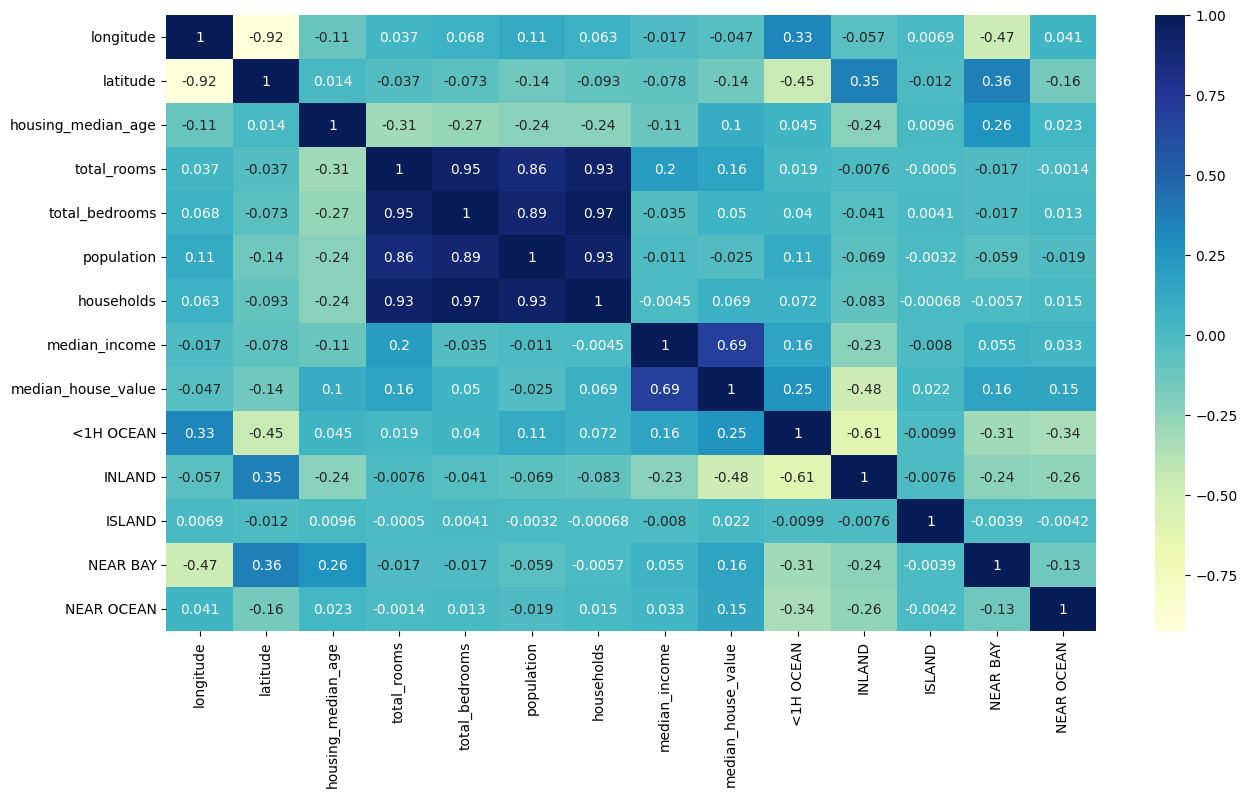

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

#FEATURE ENGINEERING 
#Adding two columns, namely the 'bedroom_ratio' and 'household_ratio' to our dataframe

In [67]:
train_data['bedroom_ratio']= train_data['total_bedrooms'] / train_data['total_rooms']

train_data['household_rooms']= train_data['total_rooms'] / train_data['households']

In [68]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,83100.0,0,0,0,1,0,0.802244,1.269366
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,262500.0,0,0,0,1,0,0.825608,1.231239
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,108600.0,0,1,0,0,0,0.783331,1.270160
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,164300.0,1,0,0,0,0,0.823031,1.229366
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,188200.0,1,0,0,0,0,0.765206,1.319440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,211500.0,0,0,0,1,0,0.782591,1.283708
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,115700.0,0,1,0,0,0,0.804868,1.246090
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,204600.0,1,0,0,0,0,0.769303,1.295650
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,343300.0,1,0,0,0,0,0.756956,1.326185


#importing the most important bit, the Linear Regressor from sklearn

In [69]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

#Changing the X and Y axes to the data required for prediction

In [70]:
X_train=train_data.drop(['median_house_value'], axis=1)

In [71]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,0,0,0,1,0,0.802244,1.269366
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,0,0,0,1,0,0.825608,1.231239
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,0,1,0,0,0,0.783331,1.270160
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,1,0,0,0,0,0.823031,1.229366
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,1,0,0,0,0,0.765206,1.319440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,0,0,0,1,0,0.782591,1.283708
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,0,1,0,0,0,0.804868,1.246090
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,1,0,0,0,0,0.769303,1.295650
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,1,0,0,0,0,0.756956,1.326185


In [72]:
Y_train=train_data['median_house_value']

In [73]:
Y_train

55        83100.0
18218    262500.0
13327    108600.0
8374     164300.0
8360     188200.0
           ...   
1439     211500.0
12725    115700.0
3505     204600.0
11437    343300.0
9847     329500.0
Name: median_house_value, Length: 16346, dtype: float64

#Training the regressor on the training datasets

In [74]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Now, the testing dataset will be modified so that it contains the columns that we engineered ourselves and macthes the training dataset
#If the testing and training dataset vary in attributes, our regressor will fail

In [75]:
test_data= X_test.join(Y_test)

In [76]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1128,-121.61,39.76,31.0,2431.0,512.0,1026.0,427.0,2.5428,INLAND,85000.0
1087,-121.83,39.72,52.0,1890.0,420.0,974.0,383.0,1.6827,INLAND,78700.0
4915,-118.27,34.00,48.0,1869.0,461.0,1834.0,441.0,1.7052,<1H OCEAN,107400.0
4812,-118.37,34.02,44.0,1944.0,458.0,981.0,377.0,2.6154,<1H OCEAN,193200.0
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,<1H OCEAN,305600.0
...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,2038.0,629.0,2007.0,596.0,2.5701,NEAR BAY,266700.0
13208,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321,INLAND,104300.0
18834,-122.61,41.74,15.0,4206.0,922.0,1863.0,869.0,2.0591,INLAND,55700.0
11556,-117.99,33.73,17.0,5239.0,1045.0,2440.0,985.0,4.3750,<1H OCEAN,248100.0


#Hot encoding the 'Ocean Proximity' for the testing dataset

In [77]:
test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int))

In [78]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1128,-121.61,39.76,31.0,2431.0,512.0,1026.0,427.0,2.5428,INLAND,85000.0,0,1,0,0,0
1087,-121.83,39.72,52.0,1890.0,420.0,974.0,383.0,1.6827,INLAND,78700.0,0,1,0,0,0
4915,-118.27,34.00,48.0,1869.0,461.0,1834.0,441.0,1.7052,<1H OCEAN,107400.0,1,0,0,0,0
4812,-118.37,34.02,44.0,1944.0,458.0,981.0,377.0,2.6154,<1H OCEAN,193200.0,1,0,0,0,0
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,<1H OCEAN,305600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,2038.0,629.0,2007.0,596.0,2.5701,NEAR BAY,266700.0,0,0,0,1,0
13208,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321,INLAND,104300.0,0,1,0,0,0
18834,-122.61,41.74,15.0,4206.0,922.0,1863.0,869.0,2.0591,INLAND,55700.0,0,1,0,0,0
11556,-117.99,33.73,17.0,5239.0,1045.0,2440.0,985.0,4.3750,<1H OCEAN,248100.0,1,0,0,0,0


In [79]:
test_data= test_data.drop(['ocean_proximity'], axis=1)

In [80]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1128,-121.61,39.76,31.0,2431.0,512.0,1026.0,427.0,2.5428,85000.0,0,1,0,0,0
1087,-121.83,39.72,52.0,1890.0,420.0,974.0,383.0,1.6827,78700.0,0,1,0,0,0
4915,-118.27,34.00,48.0,1869.0,461.0,1834.0,441.0,1.7052,107400.0,1,0,0,0,0
4812,-118.37,34.02,44.0,1944.0,458.0,981.0,377.0,2.6154,193200.0,1,0,0,0,0
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,305600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,2038.0,629.0,2007.0,596.0,2.5701,266700.0,0,0,0,1,0
13208,-117.72,34.05,31.0,2220.0,526.0,1662.0,472.0,2.7321,104300.0,0,1,0,0,0
18834,-122.61,41.74,15.0,4206.0,922.0,1863.0,869.0,2.0591,55700.0,0,1,0,0,0
11556,-117.99,33.73,17.0,5239.0,1045.0,2440.0,985.0,4.3750,248100.0,1,0,0,0,0


#Skewing the testing data

In [81]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


In [82]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1128,-121.61,39.76,31.0,7.796469,6.240276,6.934397,6.059123,2.5428,85000.0,0,1,0,0,0
1087,-121.83,39.72,52.0,7.544861,6.042633,6.882437,5.950643,1.6827,78700.0,0,1,0,0,0
4915,-118.27,34.00,48.0,7.533694,6.135565,7.514800,6.091310,1.7052,107400.0,1,0,0,0,0
4812,-118.37,34.02,44.0,7.573017,6.129050,6.889591,5.934894,2.6154,193200.0,1,0,0,0,0
10502,-117.70,33.47,21.0,7.700295,6.282267,7.261225,6.180017,3.5915,305600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,7.620215,6.445720,7.604894,6.391917,2.5701,266700.0,0,0,0,1,0
13208,-117.72,34.05,31.0,7.705713,6.267201,7.416378,6.159095,2.7321,104300.0,0,1,0,0,0
18834,-122.61,41.74,15.0,8.344505,6.827629,7.530480,6.768493,2.0591,55700.0,0,1,0,0,0
11556,-117.99,33.73,17.0,8.564077,6.952729,7.800163,6.893656,4.3750,248100.0,1,0,0,0,0


In [83]:
test_data['bedroom_ratio']= test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms'] / test_data['households']

In [84]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1128,-121.61,39.76,31.0,7.796469,6.240276,6.934397,6.059123,2.5428,85000.0,0,1,0,0,0,0.800398,1.286732
1087,-121.83,39.72,52.0,7.544861,6.042633,6.882437,5.950643,1.6827,78700.0,0,1,0,0,0,0.800894,1.267907
4915,-118.27,34.00,48.0,7.533694,6.135565,7.514800,6.091310,1.7052,107400.0,1,0,0,0,0,0.814417,1.236794
4812,-118.37,34.02,44.0,7.573017,6.129050,6.889591,5.934894,2.6154,193200.0,1,0,0,0,0,0.809327,1.276016
10502,-117.70,33.47,21.0,7.700295,6.282267,7.261225,6.180017,3.5915,305600.0,1,0,0,0,0,0.815848,1.245999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,7.620215,6.445720,7.604894,6.391917,2.5701,266700.0,0,0,0,1,0,0.845871,1.192164
13208,-117.72,34.05,31.0,7.705713,6.267201,7.416378,6.159095,2.7321,104300.0,0,1,0,0,0,0.813319,1.251111
18834,-122.61,41.74,15.0,8.344505,6.827629,7.530480,6.768493,2.0591,55700.0,0,1,0,0,0,0.818219,1.232845
11556,-117.99,33.73,17.0,8.564077,6.952729,7.800163,6.893656,4.3750,248100.0,1,0,0,0,0,0.811848,1.242313


In [85]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,83100.0,0,0,0,1,0,0.802244,1.269366
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,262500.0,0,0,0,1,0,0.825608,1.231239
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,108600.0,0,1,0,0,0,0.783331,1.270160
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,164300.0,1,0,0,0,0,0.823031,1.229366
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,188200.0,1,0,0,0,0,0.765206,1.319440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,211500.0,0,0,0,1,0,0.782591,1.283708
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,115700.0,0,1,0,0,0,0.804868,1.246090
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,204600.0,1,0,0,0,0,0.769303,1.295650
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,343300.0,1,0,0,0,0,0.756956,1.326185


In [86]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
55,-122.28,37.82,52.0,6.852243,5.497168,6.357842,5.398163,1.4113,0,0,0,1,0,0.802244,1.269366
18218,-122.07,37.40,16.0,8.117611,6.701960,7.273093,6.593045,3.7359,0,0,0,1,0,0.825608,1.231239
13327,-117.66,34.05,33.0,6.867974,5.379897,6.723832,5.407172,2.5391,0,1,0,0,0,0.783331,1.270160
8374,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,1,0,0,0,0,0.823031,1.229366
8360,-118.34,33.97,45.0,7.710205,5.899897,6.856462,5.843544,5.5000,1,0,0,0,0,0.765206,1.319440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-122.01,37.97,32.0,8.010692,6.269096,7.161622,6.240276,3.6449,0,0,0,1,0,0.782591,1.283708
12725,-121.35,38.61,27.0,8.268988,6.655440,7.346010,6.635947,2.7788,0,1,0,0,0,0.804868,1.246090
3505,-118.45,34.25,36.0,7.282074,5.602119,6.695799,5.620401,4.3839,1,0,0,0,0,0.769303,1.295650
11437,-117.96,33.65,21.0,7.616284,5.765191,6.814543,5.743003,7.8453,1,0,0,0,0,0.756956,1.326185


In [87]:
Y_train

55        83100.0
18218    262500.0
13327    108600.0
8374     164300.0
8360     188200.0
           ...   
1439     211500.0
12725    115700.0
3505     204600.0
11437    343300.0
9847     329500.0
Name: median_house_value, Length: 16346, dtype: float64

#Once again, changing the X and Y axes as per the prediction 

In [91]:
X_test= test_data.drop(['median_house_value'], axis=1)

In [92]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1128,-121.61,39.76,31.0,7.796469,6.240276,6.934397,6.059123,2.5428,0,1,0,0,0,0.800398,1.286732
1087,-121.83,39.72,52.0,7.544861,6.042633,6.882437,5.950643,1.6827,0,1,0,0,0,0.800894,1.267907
4915,-118.27,34.00,48.0,7.533694,6.135565,7.514800,6.091310,1.7052,1,0,0,0,0,0.814417,1.236794
4812,-118.37,34.02,44.0,7.573017,6.129050,6.889591,5.934894,2.6154,1,0,0,0,0,0.809327,1.276016
10502,-117.70,33.47,21.0,7.700295,6.282267,7.261225,6.180017,3.5915,1,0,0,0,0,0.815848,1.245999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,-122.42,37.76,52.0,7.620215,6.445720,7.604894,6.391917,2.5701,0,0,0,1,0,0.845871,1.192164
13208,-117.72,34.05,31.0,7.705713,6.267201,7.416378,6.159095,2.7321,0,1,0,0,0,0.813319,1.251111
18834,-122.61,41.74,15.0,8.344505,6.827629,7.530480,6.768493,2.0591,0,1,0,0,0,0.818219,1.232845
11556,-117.99,33.73,17.0,8.564077,6.952729,7.800163,6.893656,4.3750,1,0,0,0,0,0.811848,1.242313


In [94]:
Y_test= test_data['median_house_value']

In [95]:
Y_test

1128      85000.0
1087      78700.0
4915     107400.0
4812     193200.0
10502    305600.0
           ...   
15817    266700.0
13208    104300.0
18834     55700.0
11556    248100.0
15588    221900.0
Name: median_house_value, Length: 4087, dtype: float64

In [96]:
reg.fit(X_train, Y_train)

LinearRegression()

#Running an accuracy test to see how well our regressor performs

In [97]:
reg.score(X_test, Y_test)

0.6662191359527877

#65% accuracy, which is decent for a simple linear regressor running on such a massive dataframe

#The predicted house values are mnoe stored in to 'predictions' variable

In [98]:
predictions= reg.predict(X_train) 



#The predicted values are now put into the FinalPredictedHouseValues dataframe 

In [99]:
FinalPredictedHouseValues=pd.DataFrame(predictions)

#Displaying the predicted Median House Values

In [100]:
FinalPredictedHouseValues

,0
0,160999.565868
1,261150.457442
2,91023.963192
3,220146.706036
4,304713.130713
...,...
16341,211544.506135
16342,135191.192378
16343,238523.754318
16344,367554.346225


#The values on the second column are the predicted Median House Values

#The Project is now complete